In [1]:
%matplotlib inline


# Structural similarity index


When comparing images, the mean squared error (MSE)--while simple to
implement--is not highly indicative of perceived similarity.  Structural
similarity aims to address this shortcoming by taking texture into account
[1]_, [2]_.

The example shows two modifications of the input image, each with the same MSE,
but with very different mean structural similarity indices.

.. [1] Zhou Wang; Bovik, A.C.; ,"Mean squared error: Love it or leave it? A new
       look at Signal Fidelity Measures," Signal Processing Magazine, IEEE,
       vol. 26, no. 1, pp. 98-117, Jan. 2009.

.. [2] Z. Wang, A. C. Bovik, H. R. Sheikh and E. P. Simoncelli, "Image quality
       assessment: From error visibility to structural similarity," IEEE
       Transactions on Image Processing, vol. 13, no. 4, pp. 600-612,
       Apr. 2004.



/home/u1804/anaconda3/envs/tfgpu_r1.13.1_py37/lib/python3.7/site-packages/skimage/data
(512, 512, 3)


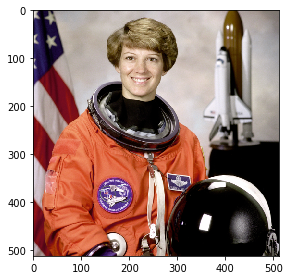

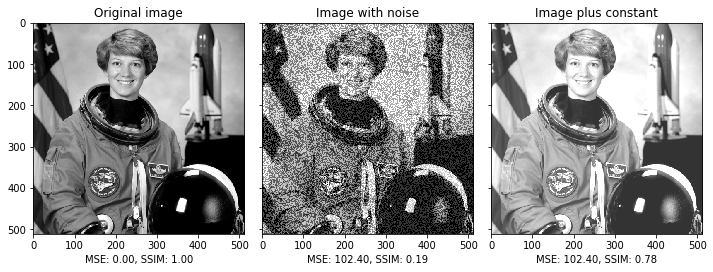

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float,color,io
from skimage.measure import compare_ssim as ssim

from skimage import data_dir
print (data_dir)

# astronaut , chelsea ,moon ,immunohistochemistry , horse ,coffee ,logo ,coins ,clock ,checkerboard
img2=data.astronaut()

img = img_as_float(data.astronaut())
print(img.shape)

io.imshow(img)
io.show()

img=color.rgb2gray(img)
rows, cols = img.shape


noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1

def mse(x, y):
    return np.linalg.norm(x - y)

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mse(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mse(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = mse(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

label = 'MSE: {:.2f}, SSIM: {:.2f}'

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise))
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_const, ssim_const))
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()